### Creating a simple bar plot to show imbalances of the models
The gloabl mean TOA radiation values for CERES are plotted from 2001 to 2021. You can choose which year of the simulatiom should be plotted.

In [1]:
import sys
sys.path.insert(0,'../../')
from radiation import new_process_ceres_data, new_process_model_data
from radiation import new_barplot_model_data

OpenBLAS blas_thread_init: pthread_create failed for thread 52 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 53 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 54 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 55 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 56 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 57 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 ma

KeyboardInterrupt: 

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [ ]:
ifs_4km = new_process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')
ifs_9km = new_process_model_data(model =  'IFS' , exp = 'tco1279-orca025-cycle3' , source = 'lra-r100-monthly')
icon = new_process_model_data(model =  'ICON' , exp = 'ngc3028' , source = 'lra-r100-monthly')
ceres = new_process_ceres_data(exp = "ebaf-toa41", source = "monthly")

#TOA_ifs_4km_gm, reader_ifs_4km, data_ifs_4km, TOA_ifs_4km, TOA_ifs_4km_r360x180 = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')

NameError: name 'new_process_model_data' is not defined

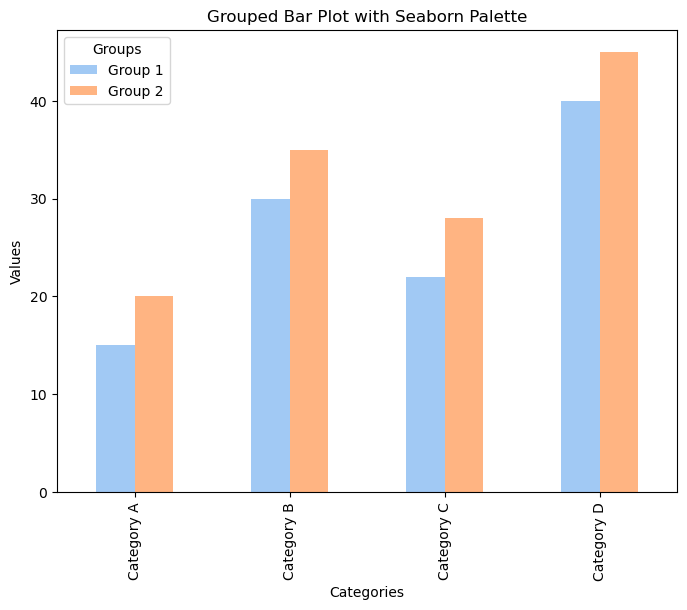

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data in a Pandas DataFrame
data = pd.DataFrame({
    'Category': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Group 1': [15, 30, 22, 40],
    'Group 2': [20, 35, 28, 45]
})

# Set a Seaborn color palette
sns.set_palette("pastel")

# Create a grouped bar plot
ax = data.plot(x='Category', kind='bar', figsize=(8, 6))

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Plot with Seaborn Palette')

# Show the plot
plt.legend(title='Groups')
plt.show()

In [ ]:
dataset = ceres['clim_gm'] 
[-dataset["mtntrf"].mean().values[0] for i in range (0, len(dataset))]

In [ ]:
[-datasets[i]["mtntrf"].mean().values for i in range (0, len(datasets))]

In [ ]:
datasets = [ceres['clim_gm'], icon['gm'], ifs_4km['gm'], ifs_9km['gm']]
model_names = ['ceres', 'icon', 'ifs 4.4 km', 'ifs 9 km']
new_barplot_model_data(datasets, model_names, outputdir='test', outputfig='test')

[<xarray.DataArray 'mtntrf' ()>
array(240.35899745)
Attributes:
    long_name:      Mean top net thermal radiation flux
    standard_name:  TOA Longwave Flux - All-Sky
    CF_name:        toa_outgoing_longwave_flux
    comment:        none
    units:          W m-2
    valid_min:            0.00000
    valid_max:            400.000
    history:        2023-10-06 19:09:33 variable derived by AQUA fixer;\n
    paramId:        172179
    cfVarName:      mtntrf
    shortName:      mtntrf
    derived:        0.-toa_lw_all_mon, <xarray.DataArray 'mtntrf' ()>
array(240.92605062)
Attributes: (12/13)
    cell_methods:   time: mean cell: mean
    component:      atmo
    grid_mapping:   crs
    long_name:      Mean top net thermal radiation flux
    standard_name:  toa_outgoing_longwave_flux
    units:          W m-2
    ...             ...
    history:        2023-05-25 10:31:02 variable derived by AQUA fixer;\n2023...
    paramId:        172179
    cfVarName:      mtntrf
    shortName:      mt

TypeError: no numeric data to plot

A similar method will be introduced in the upcomming version of this diagnostic. This will include a boxplot showing more statistics such as median, quantiles, etc.